In [31]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

salary_df = pd.read_csv("Salary.csv")
male_df = salary_df[salary_df.Gender == "Male"]
female_df = salary_df[salary_df.Gender == "Female"]

#todo: Don't forget to add titles to all and markdowns in between each category!

In [32]:

#* Functions 
def age_group_funct(age):
    if 19 < age < 30:
        return "20 - 29"
    elif 29 < age < 40:
        return "30 - 39"
    elif 39 < age < 50:
        return "40 - 49"
    else: 
        return "50+"

def education_level_funct(num):
    if num == 0:
        return "High School"
    elif num == 1:
        return "Bachelor Degree"
    elif num == 2:
        return "Master Degree"
    else: 
        return "Phd"

def years_exp_funct(num):
    if -1 < num < 5:
        return "0 - 4"
    elif 4 < num < 11:
        return "5 - 10"
    elif 10 < num < 20:
        return "11 - 19"
    else:
        return "20+"

#* Data
# Country Means
male_UK_mean = round(male_df[male_df.Country == "UK"].Salary.mean(), 2)
male_USA_mean = round(male_df[male_df.Country == "USA"].Salary.mean(), 2)
male_Canada_mean = round(male_df[male_df.Country == "Canada"].Salary.mean(), 2)
male_China_mean = round(male_df[male_df.Country == "China"].Salary.mean(), 2)
male_Australia_mean = round(male_df[male_df.Country == "Australia"].Salary.mean(), 2)

female_UK_mean = round(female_df[female_df.Country == "UK"].Salary.mean(), 2)
female_USA_mean = round(female_df[female_df.Country == "USA"].Salary.mean(), 2)
female_Canada_mean = round(female_df[female_df.Country == "Canada"].Salary.mean(), 2)
female_China_mean = round(female_df[female_df.Country == "China"].Salary.mean(), 2)
female_Australia_mean = round(female_df[female_df.Country == "Australia"].Salary.mean(), 2)


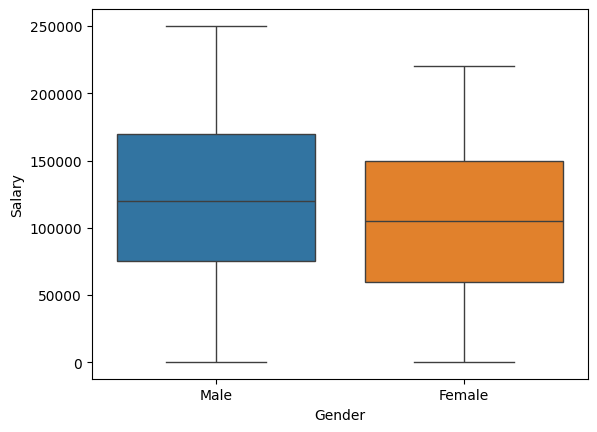

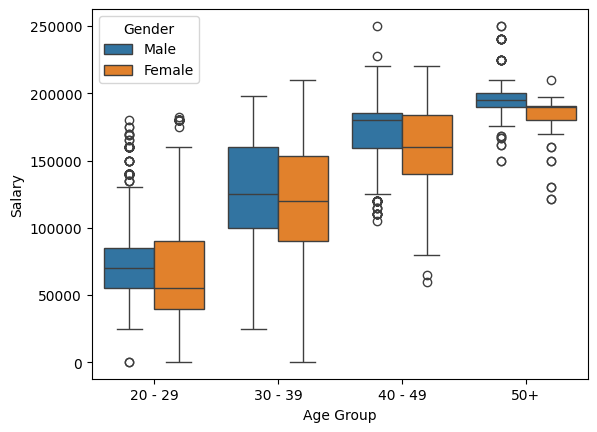

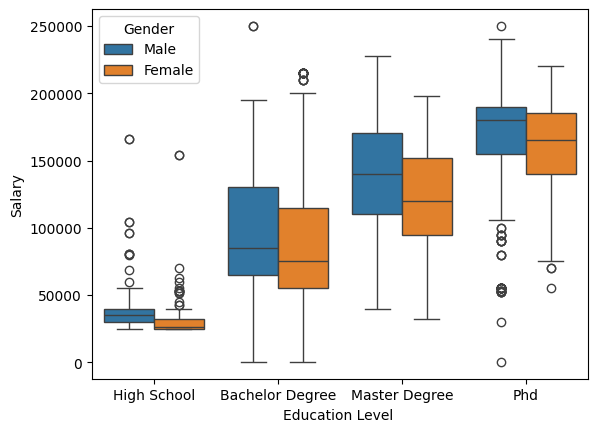

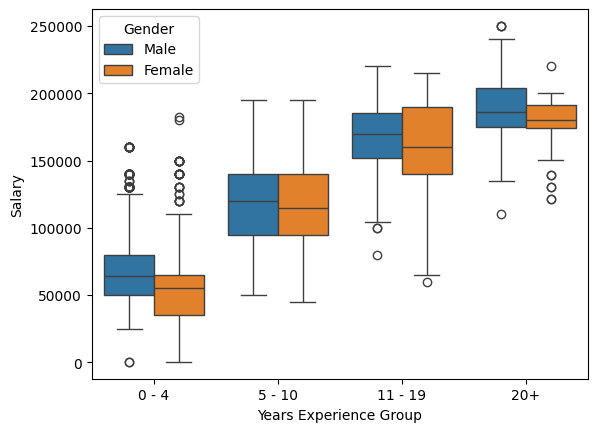

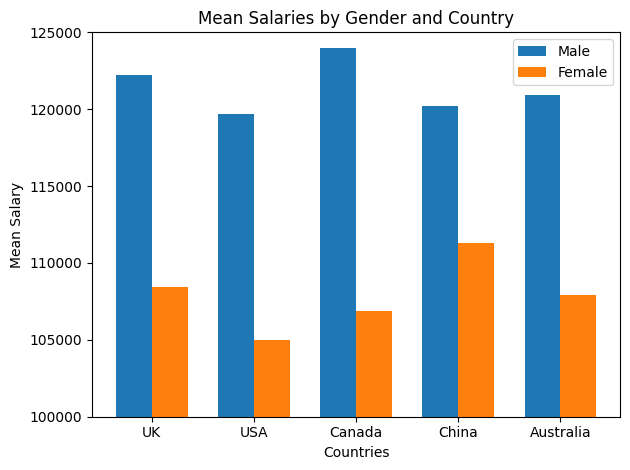

In [34]:

#* Showing Plots (Make sure I come back and put mark downs in between all of these!)

#! Basic Data
sns.boxplot(data = salary_df, x = "Gender", y = "Salary", hue = "Gender")
plt.show()
plt.close()

#! Age 
salary_df["Age Group"] = salary_df.Age.apply(age_group_funct)
age_order = ["20 - 29", "30 - 39", "40 - 49", "50+"]

sns.boxplot(data = salary_df, x = "Age Group", y = "Salary", order = age_order, hue="Gender")
plt.show()
plt.close()

#! Education Level
salary_df["Education Level "] = salary_df["Education Level"].apply(education_level_funct)
ed_order = ["High School", "Bachelor Degree", "Master Degree", "Phd"]

sns.boxplot(data = salary_df, x = "Education Level ", y = "Salary", order = ed_order, hue="Gender")
plt.show()
plt.close()

#! Years Experience
salary_df["Years Experience Group"] = salary_df["Years of Experience"].apply(years_exp_funct)
exp_order = ["0 - 4", "5 - 10", "11 - 19", "20+"]

sns.boxplot(data = salary_df, x = "Years Experience Group", y = "Salary", order = exp_order, hue="Gender")
plt.show()
plt.close()

#! Country
""" #? overlapping histogram?
plt.hist(scores_urban, color="green", label="Urban", normed=True, alpha = 0.5)
plt.hist(specific_data,
 color="green",
   label="label for these bars",
     normed=(boolean that sets whether some of bar heights totals to equal 1),
       alpha= "Determines the opacity of the bars, where 1.0 means completely opaque!)
plt.show()
"""

countries = ["UK", "USA", "Canada", "China", "Australia"]
male_means = [male_UK_mean, male_USA_mean, male_Canada_mean, male_China_mean, male_Australia_mean]
female_means = [female_UK_mean, female_USA_mean, female_Canada_mean, female_China_mean, female_Australia_mean]

bar_width = 0.35
x = range(len(countries))
plt.bar(x, male_means, width=bar_width, label='Male', align='center')
plt.bar([i + bar_width for i in x], female_means, width=bar_width, label='Female', align='center')


plt.xlabel("Countries")
plt.ylabel("Mean Salary")
plt.title("Mean Salaries by Gender and Country")
plt.xticks([i + bar_width / 2 for i in x], countries)
plt.legend()
plt.ylim(100000, 125000)  
plt.tight_layout()
plt.show()
plt.close()
